In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.pca import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/MI_timesteps.txt',delim_whitespace=True)
data = np.array(df,dtype=float)
# remove burn-in period of 1000 time steps 
data = data[1000:, ]

In [3]:
data.shape

(14001, 10)

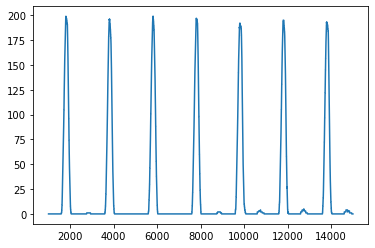

In [4]:
plt.plot(data[:, 0], data[:, 1])

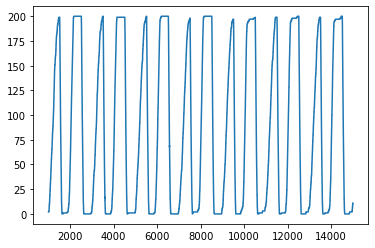

In [5]:
plt.plot(data[:, 0], data[:, 2])

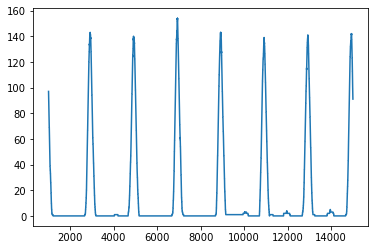

In [6]:
plt.plot(data[:, 0], data[:, 3])

## Task5.1

In [7]:
delay = 351
delay_embedd = np.empty((data.shape[0] - delay, delay*3))
for i in range(data.shape[0] - delay):
    delay_embedd[i] = data[i: i+delay, 1:4].reshape(-1)

In [8]:
u,s,vh,s_truncated = pca(delay_embedd, 3)

In [9]:
proj = (u @ s_truncated)

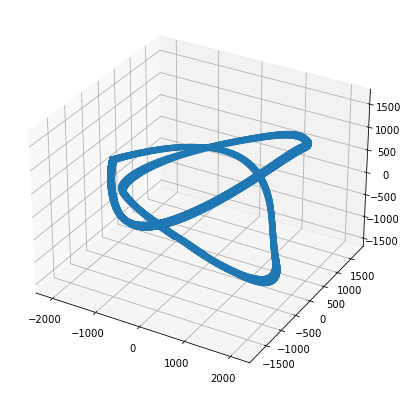

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')
ax.scatter(proj[:,0], proj[:,1], proj[:,2])

# Task5.2

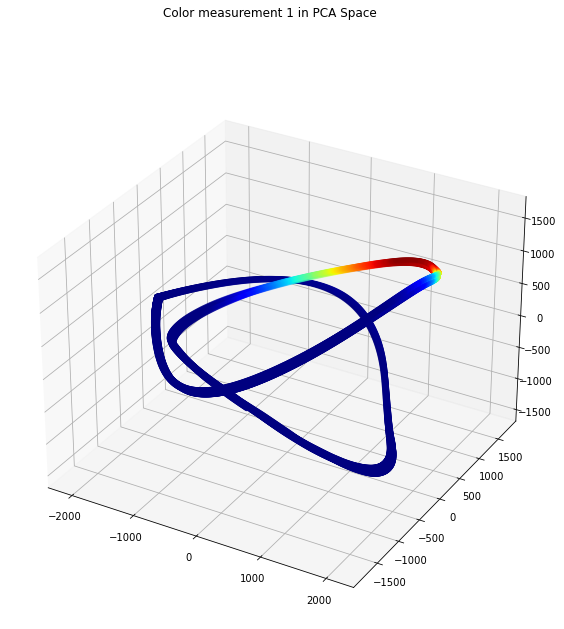

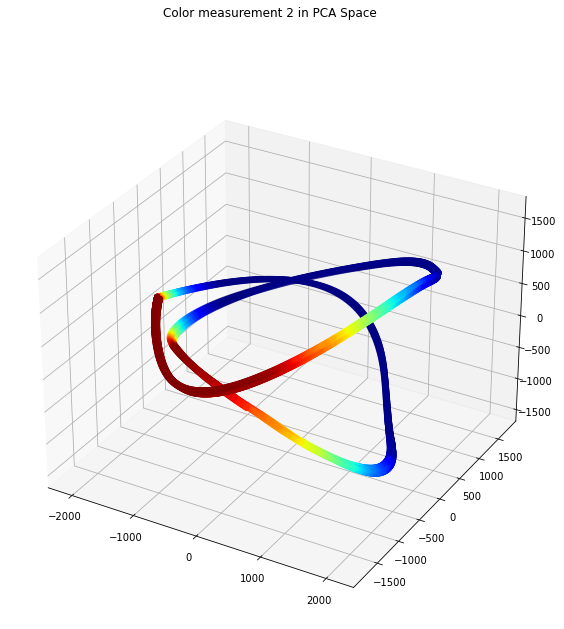

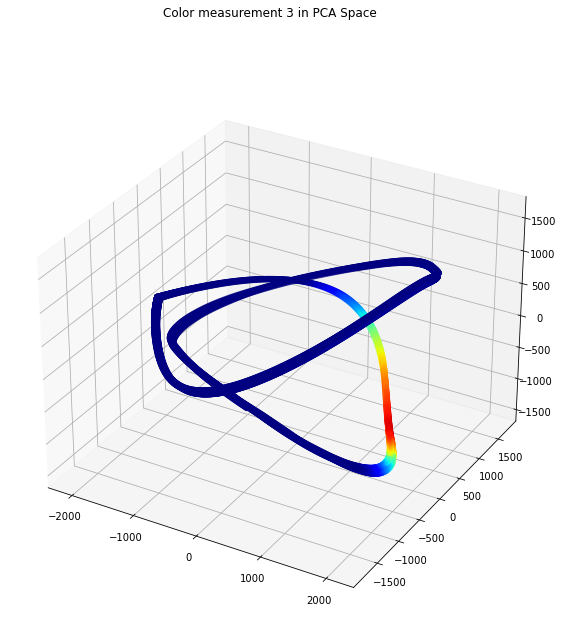

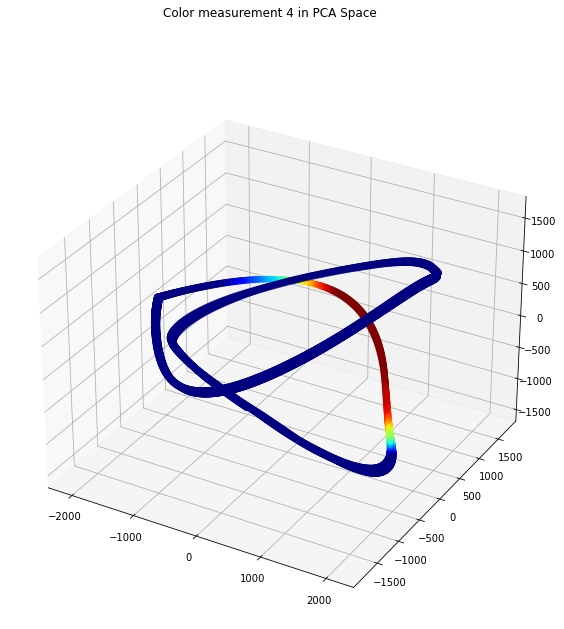

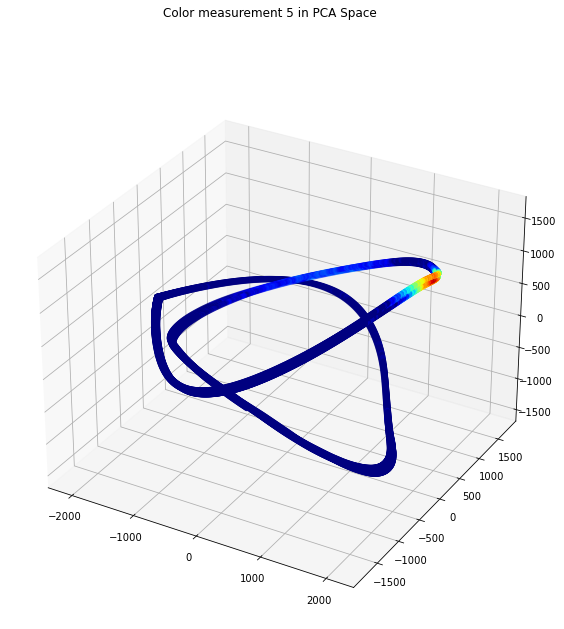

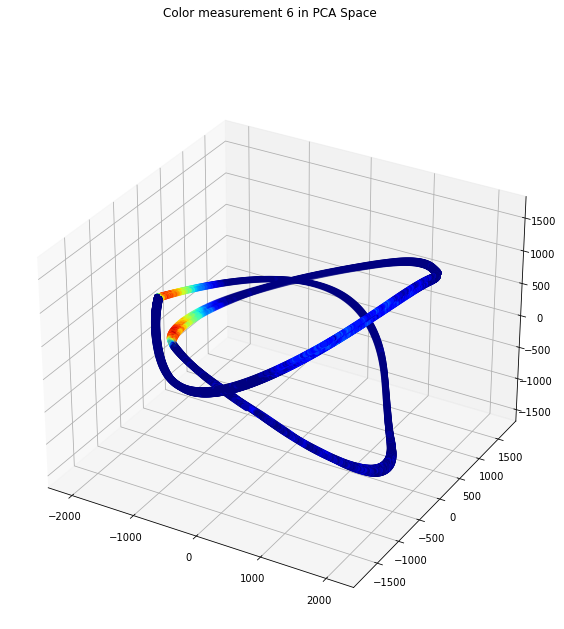

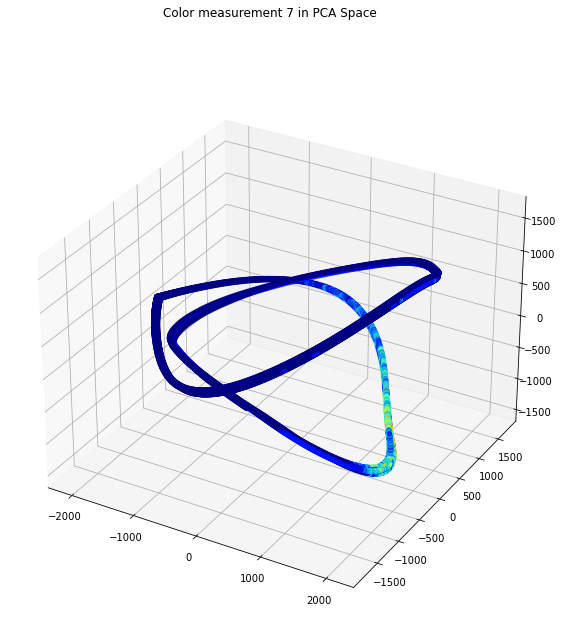

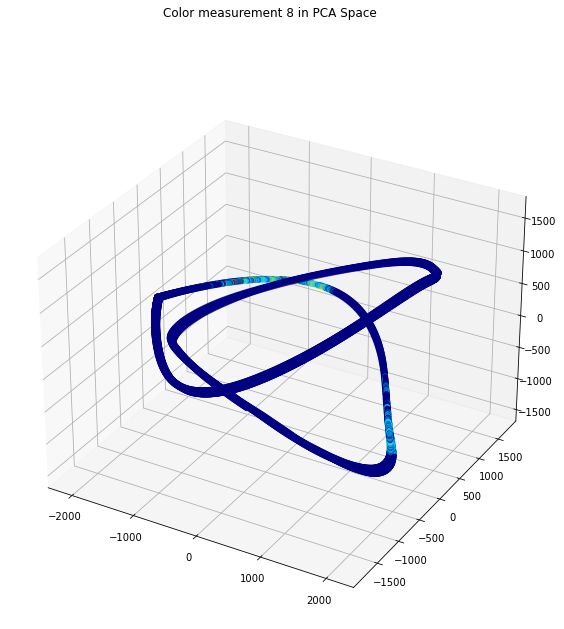

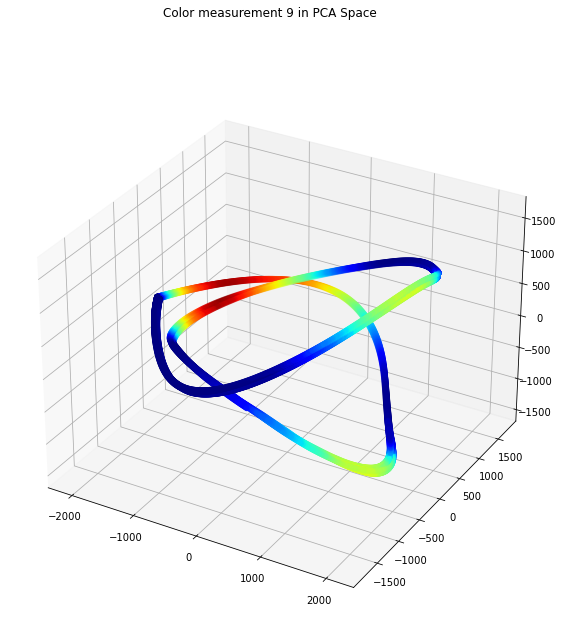

In [11]:
for i in range(1, 10):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca(projection='3d')
    ax.scatter(proj[:, 0], proj[:, 1], proj[:, 2], c=data[delay:, i],
               cmap='jet')
    plt.suptitle('Color measurement %d in PCA Space'% i)
    
    plt.show()

# Task5.3

In [12]:
pca_space = proj[:,:3]

dim_index = 1
v_field, arc_function, v_field_o, arc_function_o = arc_length_velocity(pca_space, data, dim_index, delay)

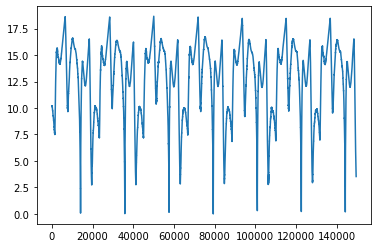

In [13]:
plt.plot(v_field[:,0], v_field[:,1])

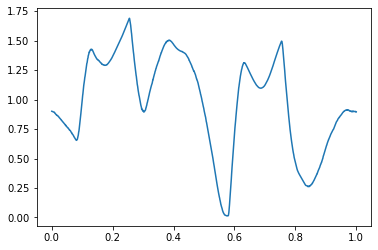

In [14]:
plt.plot(v_field_o[:,0], v_field_o[:,1])

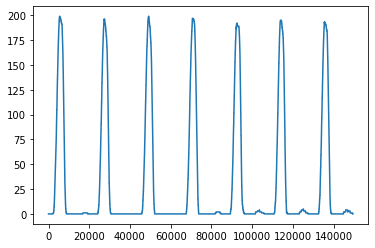

In [15]:
plt.plot(arc_function[:,0], arc_function[:,1])

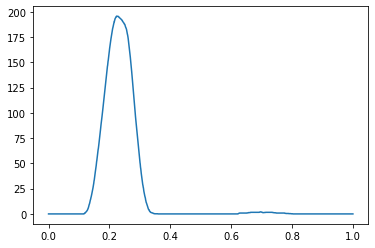

In [16]:
plt.plot(arc_function_o[:,0], arc_function_o[:,1])

# Task5.4

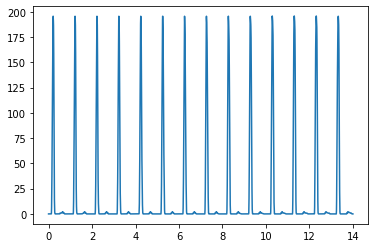

In [17]:
prediction_measurement = predict(14, v_field_o, arc_function_o)

plt.plot(prediction_measurement[:,0], prediction_measurement[:,1])